<a href="https://colab.research.google.com/github/Varshini-svnit/ML_LABS/blob/main/mllab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import RandomOverSampler, SMOTE


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
# Load your Kaggle Iris dataset
df = pd.read_csv("Iris.csv")

# Drop Id column (not useful for ML)
df = df.drop("Id", axis=1)

# Encode species column
encoder = LabelEncoder()
df["Species_encoded"] = encoder.fit_transform(df["Species"])

# Features and target
X = df.drop(["Species", "Species_encoded"], axis=1)
y = df["Species_encoded"]

df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
# First split: Train vs Temp (80:20)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Validation vs Test (10:10)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
preds = np.round(model.predict(X_test)).astype(int)
preds = np.clip(preds, 0, len(np.unique(y))-1)

# Accuracy
acc_80 = accuracy_score(y_test, preds)
print("Accuracy (80:10:10):", acc_80)


Accuracy (80:10:10): 1.0


In [ ]:
# First split: Train vs Temp (70:30)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Validation vs Test (15:15)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
preds = np.round(model.predict(X_test)).astype(int)
preds = np.clip(preds, 0, len(np.unique(y))-1)

# Accuracy
acc_70 = accuracy_score(y_test, preds)
print("Accuracy (70:15:15):", acc_70)


Accuracy (70:15:15): 1.0


In [ ]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

model = LinearRegression()
model.fit(X_res, y_res)

preds = np.round(model.predict(X_res)).astype(int)
preds = np.clip(preds, 0, len(np.unique(y))-1)

acc_over = accuracy_score(y_res, preds)
print("Accuracy after Oversampling:", acc_over)


Accuracy after Oversampling: 0.9733333333333334


/Users/loki/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/loki/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
smote = SMOTE(random_state=42, k_neighbors=2)
X_res, y_res = smote.fit_resample(X, y)

model = LinearRegression()
model.fit(X_res, y_res)

preds = np.round(model.predict(X_res)).astype(int)
preds = np.clip(preds, 0, len(np.unique(y))-1)

acc_smote_a = accuracy_score(y_res, preds)
print("Accuracy with SMOTE (2 neighbors):", acc_smote_a)


Accuracy with SMOTE (2 neighbors): 0.9733333333333334


/Users/loki/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [ ]:
smote = SMOTE(random_state=42, k_neighbors=1)
X_res, y_res = smote.fit_resample(X, y)

model = LinearRegression()
model.fit(X_res, y_res)

preds = np.round(model.predict(X_res)).astype(int)
preds = np.clip(preds, 0, len(np.unique(y))-1)

acc_smote_b = accuracy_score(y_res, preds)
print("Accuracy with SMOTE (nearest neighbor):", acc_smote_b)


Accuracy with SMOTE (nearest neighbor): 0.9733333333333334


/Users/loki/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Linear Regression (80:10:10): 1.0000
Linear Regression (70:15:15): 1.0000
Oversampling: 0.9733
SMOTE (2 neighbors): 0.9733
SMOTE (nearest neighbor): 0.9733


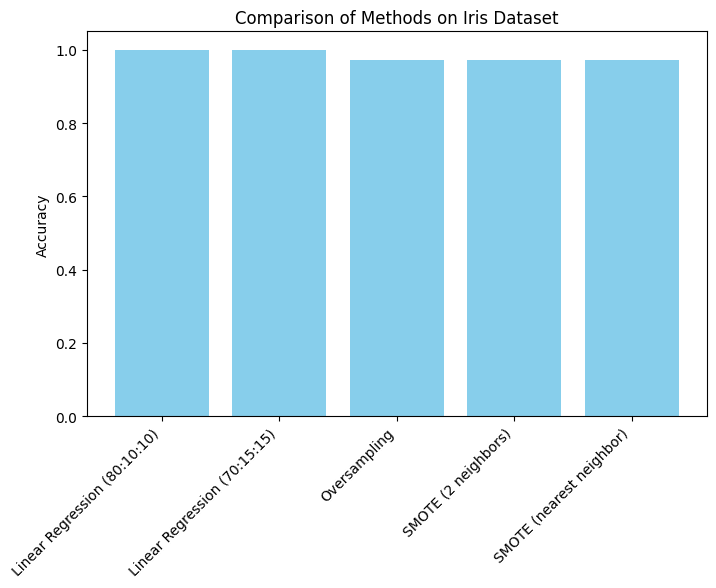

In [ ]:
results = {
    "Linear Regression (80:10:10)": acc_80,
    "Linear Regression (70:15:15)": acc_70,
    "Oversampling": acc_over,
    "SMOTE (2 neighbors)": acc_smote_a,
    "SMOTE (nearest neighbor)": acc_smote_b
}

for method, acc in results.items():
    print(f"{method}: {acc:.4f}")

# Bar plot
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("Comparison of Methods on Iris Dataset")
plt.show()
